In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^IXIC', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,2989.050049,2994.100098,2973.649902,2983.659912,2983.659912,1341660000
2012-03-13,3003.709961,3039.889893,2996.459961,3039.879883,3039.879883,1709900000
2012-03-14,3042.209961,3051.370117,3024.729980,3040.729980,3040.729980,1662300000
2012-03-15,3048.580078,3059.810059,3037.820068,3056.370117,3056.370117,1677540000
2012-03-16,3058.489990,3060.820068,3047.689941,3055.260010,3055.260010,2088610000
2012-03-19,3057.239990,3087.100098,3050.889893,3078.320068,3078.320068,1548400000
2012-03-20,3060.929932,3078.719971,3050.820068,3074.149902,3074.149902,1508580000
2012-03-21,3077.439941,3090.080078,3069.090088,3075.320068,3075.320068,1552400000
2012-03-22,3055.000000,3068.500000,3050.699951,3063.320068,3063.320068,1524800000


In [7]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [8]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,3075.889893,3078.080078,3047.139893,3049.409912,39.124879,3107.878217,3042.277672,2993.627676,-4.969971,0,3044.110107
1,3049.080078,3061.770020,3039.580078,3044.110107,38.306012,3101.805064,3042.313958,2994.296317,10.969971,1,3064.179932
2,3053.209961,3066.310059,3037.270020,3064.179932,43.134960,3098.221718,3042.746948,2995.221928,27.959961,1,3101.169922
3,3073.209961,3102.969971,3070.250000,3101.169922,50.747685,3098.502499,3043.903838,2996.625213,12.740234,1,3104.120117
4,3091.379883,3112.449951,3088.050049,3104.120117,51.304756,3099.037510,3045.096240,2998.048986,-24.899902,0,3072.870117
5,3097.770020,3102.560059,3065.239990,3072.870117,45.468224,3096.545378,3045.646218,2999.039995,-60.939941,0,3005.620117
6,3066.560059,3066.560059,3000.270020,3005.620117,36.020063,3087.885829,3044.853621,2999.127149,11.040039,1,3016.959961
7,3005.919922,3020.610107,2995.780029,3016.959961,38.335087,3081.130984,3044.301272,2999.363345,1.020020,1,2990.459961
8,2989.439941,3006.590088,2974.070068,2990.459961,35.150553,3072.495649,3043.235107,2999.245419,-30.120117,0,2981.699951
9,3011.820068,3012.949951,2978.729980,2981.699951,34.145914,3063.848440,3042.016589,2999.013029,-18.919922,0,2986.120117


In [ ]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.01784292 0.01665396 0.01789582 ... 0.35641244 0.         0.01567037]
 [0.01582441 0.01543284 0.01732338 ... 0.36793032 1.         0.01718846]
 [0.01613535 0.01577275 0.01714846 ... 0.38020695 1.         0.01998638]
 ...
 [0.6117503  0.63401283 0.6133868  ... 0.37730887 1.         0.64482503]
 [0.63988764 0.64294181 0.63904628 ... 0.50361643 1.         0.66445364]
 [0.64626463 0.65801447 0.6513554  ... 0.45516687 1.         0.66550957]]


In [10]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])


#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2449
[[[1.78429177e-02 1.66539645e-02 1.78958156e-02 ... 1.32187340e-02
   3.20174670e-03 8.30612484e-04]
  [1.58244134e-02 1.54328401e-02 1.73233813e-02 ... 1.27441150e-02
   3.20471416e-03 8.86532323e-04]
  [1.61353513e-02 1.57727502e-02 1.71484620e-02 ... 1.24640753e-02
   3.24012400e-03 9.63943026e-04]
  ...
  [6.04124901e-03 5.43028020e-03 7.69472672e-03 ... 0.00000000e+00
   3.70140191e-04 4.51167331e-05]
  [7.88435906e-03 8.35168587e-03 9.83459411e-03 ... 2.09270381e-04
   3.04063890e-04 2.58588885e-05]
  [9.19439340e-03 9.08091315e-03 1.06713114e-02 ... 4.72517631e-04
   2.55376602e-04 1.78555884e-05]]

 [[1.58244134e-02 1.54328401e-02 1.73233813e-02 ... 1.27441150e-02
   3.20471416e-03 8.86532323e-04]
  [1.61353513e-02 1.57727502e-02 1.71484620e-02 ... 1.24640753e-02
   3.24012400e-03 9.63943026e-04]
  [1.76411463e-02 1.85174560e-02 1.96457289e-02 ... 1.24860185e-02
   3.33473440e-03 1.08130256e-03]
  ...
  [7.88435906e-03 8.35168587e-03 9.83459411e-03 ... 2.09270381e-04
   3.

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [11]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1935
(1935, 30, 8)
(484, 30, 8)
(1935, 1)
(484, 1)
[[0.01171212]
 [0.01324383]
 [0.01310843]
 ...
 [0.61010246]
 [0.61300478]
 [0.6173337 ]]


In [12]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
117/117 [==============================] - 4s 20ms/step - loss: 0.0011 - val_loss: 7.5838e-04
Epoch 2/30
117/117 [==============================] - 2s 17ms/step - loss: 5.8684e-05 - val_loss: 8.5747e-04
Epoch 3/30
117/117 [==============================] - 2s 17ms/step - loss: 6.0881e-05 - val_loss: 5.5725e-04
Epoch 4/30
117/117 [==============================] - 2s 16ms/step - loss: 6.2560e-05 - val_loss: 5.6297e-04
Epoch 5/30
117/117 [==============================] - 2s 16ms/step - loss: 5.6155e-05 - val_loss: 5.4013e-04
Epoch 6/30
117/117 [==============================] - 2s 16ms/step - loss: 6.0453e-05 - val_loss: 7.0547e-04
Epoch 7/30
117/117 [==============================] - 2s 17ms/step - loss: 5.6171e-05 - val_loss: 4.8408e-04
Epoch 8/30
117/117 [==============================] - 2s 15ms/step - loss: 5.0787e-05 - val_loss: 4.6525e-04
Epoch 9/30
117/117 [==============================] - 2s 15ms/step - loss: 6.1023e-05 - val_loss: 5.4098e-04
Epoch 10/30
117/117 [==

In [13]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 0s 7ms/step
[0.5942792] [0.62562914]
[0.5988583] [0.61828526]
[0.60469496] [0.61506147]
[0.6021228] [0.6010272]
[0.5998891] [0.61838054]
[0.5911625] [0.6206694]
[0.59915537] [0.61891453]
[0.604525] [0.62726752]
[0.60505784] [0.63340264]
[0.6107034] [0.62853294]


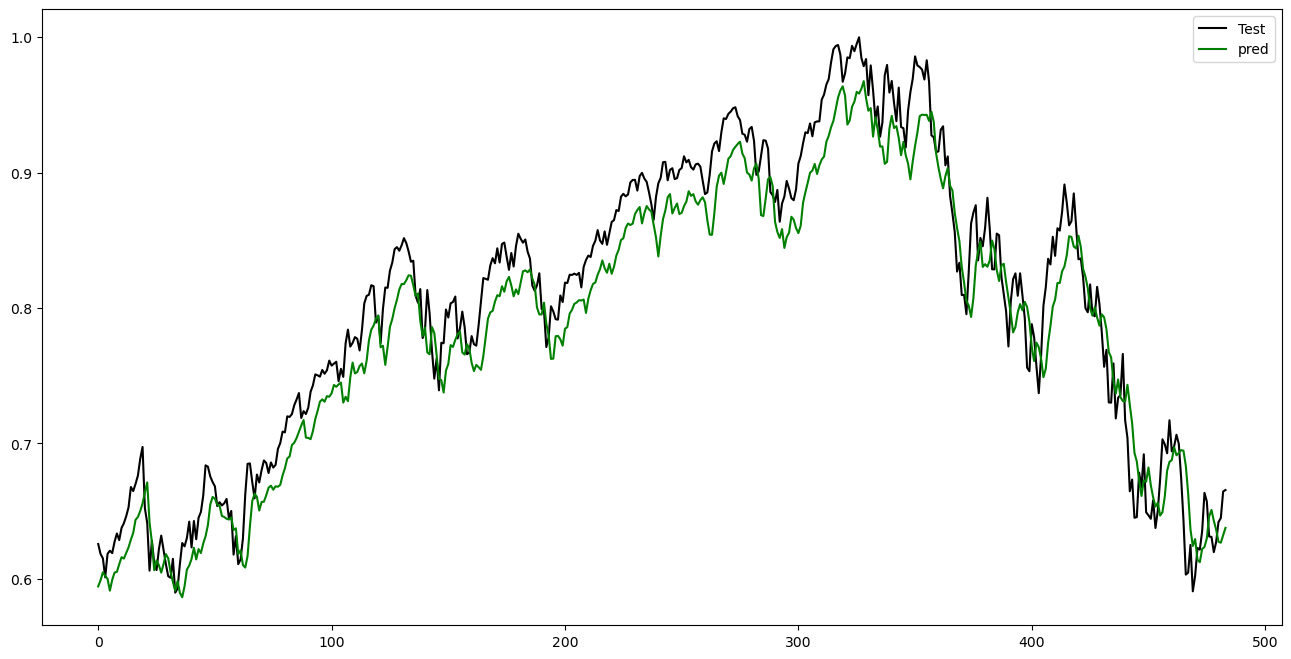

In [14]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()